# This is the look at the USA cars fuel utilisation and engines and electric vehicles etc.


Data downloaded from the website: https://www.fueleconomy.gov/feg/download.shtml

#### Getting familiar with the data

* First importing libraries

In [1]:
import pandas as pd

* Reading data into the dataframe with pandas

In [2]:
vehicles = pd.read_csv("vehicles.csv", low_memory=False)

In [3]:
#vehicles[vehicles['fuelType1']=='Electricity'].sort_values(by='year')['year']

* Checking what columns are available and how many rows by running info() method.

In [4]:
vehicles.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [5]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44593 entries, 0 to 44592
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        44593 non-null  float64
 1   barrelsA08       44593 non-null  float64
 2   charge120        44593 non-null  float64
 3   charge240        44593 non-null  float64
 4   city08           44593 non-null  int64  
 5   city08U          44593 non-null  float64
 6   cityA08          44593 non-null  int64  
 7   cityA08U         44593 non-null  float64
 8   cityCD           44593 non-null  float64
 9   cityE            44593 non-null  float64
 10  cityUF           44593 non-null  float64
 11  co2              44593 non-null  int64  
 12  co2A             44593 non-null  int64  
 13  co2TailpipeAGpm  44593 non-null  float64
 14  co2TailpipeGpm   44593 non-null  float64
 15  comb08           44593 non-null  int64  
 16  comb08U          44593 non-null  float64
 17  combA08     

* Visually checking how much of the data is missing with heatmap in seaborn

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

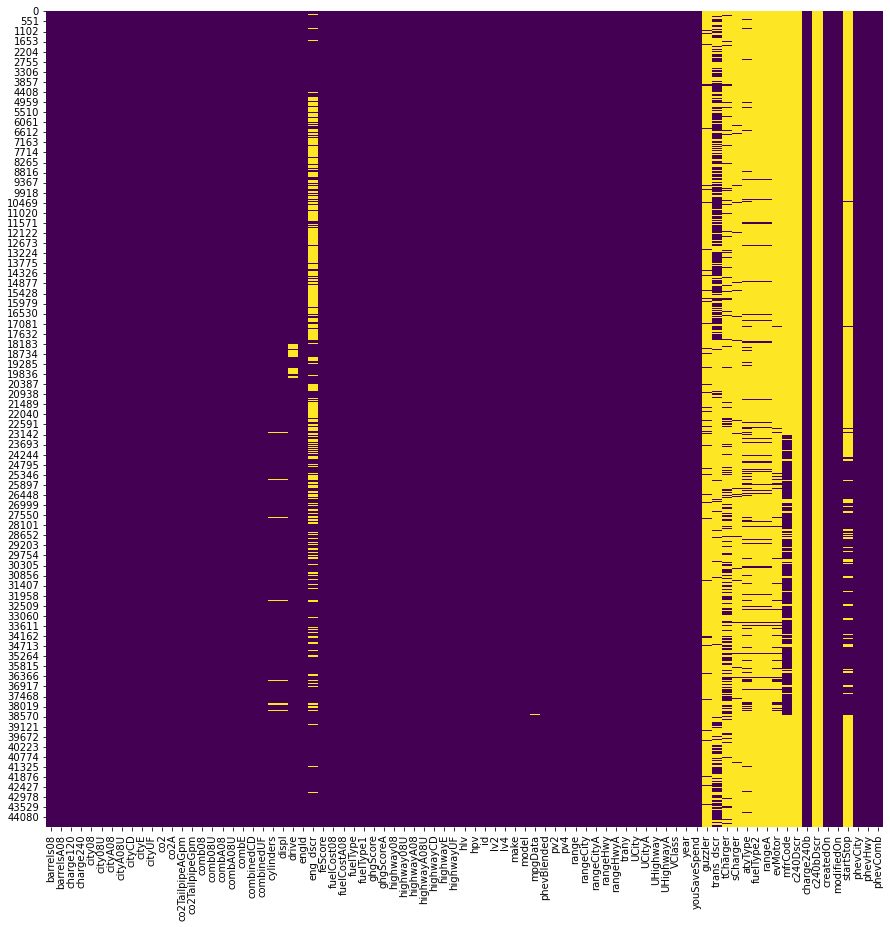

In [7]:
plt.figure(figsize = (15, 15))
sns.heatmap(vehicles.isna(), cbar = False, cmap = 'viridis', xticklabels=True)

This plot gives us good overview of where we have missing data, so that if we have to use one we can decide what to do with it. I am not going to clean it now, as I may not need them and I will only lose time.

#### Summarizing data

* Trying to see how many vehicles for each fuel type are included in the database in each year, but making a count per year and graphing

In [8]:
vehicles['fuelType'].value_counts() #44593

Regular                        27855
Premium                        13169
Gasoline or E85                 1369
Diesel                          1231
Electricity                      353
Midgrade                         138
Premium or E85                   127
Premium and Electricity          125
Regular Gas and Electricity       77
CNG                               60
Premium Gas or Electricity        57
Gasoline or natural gas           20
Gasoline or propane                8
Regular Gas or Electricity         4
Name: fuelType, dtype: int64

* Now we are going to separate those per year

In [9]:
vehicles_makes_by_year_by_fueltype = vehicles.groupby(by = ['year', 'fuelType1']).count()['make'].unstack()

In [10]:
vehicles_makes_by_year_by_fueltype

fuelType1,Diesel,Electricity,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
year,,,,,,
1984,262.0,NaN,NaN,NaN,NaN,1702.0
1985,158.0,NaN,NaN,NaN,101.0,1442.0
1986,71.0,NaN,NaN,NaN,75.0,1064.0
1987,56.0,NaN,NaN,NaN,89.0,1102.0
1988,31.0,NaN,NaN,NaN,104.0,995.0
1989,33.0,NaN,NaN,NaN,142.0,978.0
1990,29.0,NaN,NaN,NaN,128.0,921.0
1991,39.0,NaN,NaN,NaN,198.0,895.0
1992,23.0,NaN,NaN,NaN,221.0,877.0


#### Making a table with count of electric models and makes for graphing

* summarizing data by counting manufacturers, models and putting into the table for graphing

In [11]:
#electric vehicles manufacturers = makes
only_electric_cars = vehicles[vehicles['fuelType1']=='Electricity']
electric_vehicles_manufacturers_count = only_electric_cars.groupby(['year', 'make']).count()['model'].groupby('year').count()

In [12]:
#electric vehicles car models
electric_vehicles_models_count = only_electric_cars.groupby(['year', 'make']).count()['model'].groupby(by = 'year').sum()

In [13]:
#electric vehicles all count of makes
all_vehicles_manufacturers_count = vehicles.groupby('year').count()['model']

In [14]:
count_table_electric_vehicles = pd.merge(all_vehicles_manufacturers_count, electric_vehicles_models_count, left_index=True, right_index = True, how = 'left')
count_table_electric_vehicles = pd.merge(count_table_electric_vehicles, electric_vehicles_manufacturers_count, left_index=True, right_index = True, how = 'left')
count_table_electric_vehicles.columns = ['all_fuels','electric_models','electric_makes']


* graphing prepared table for display

Models

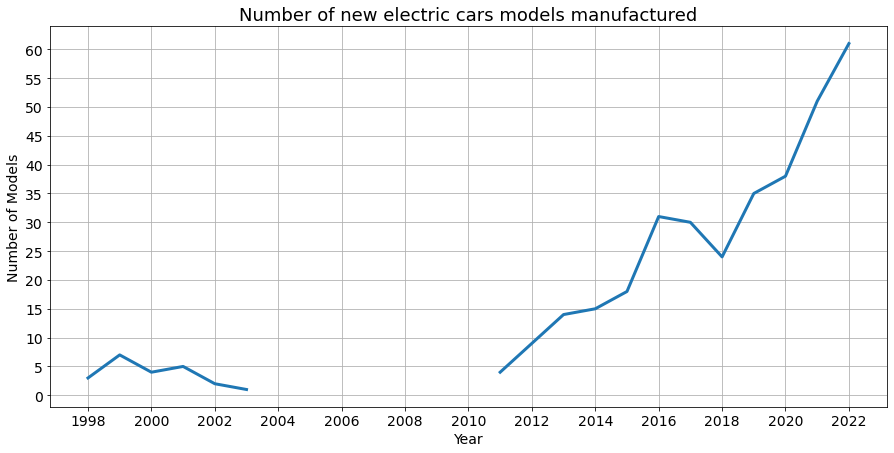

In [15]:
plt.figure(figsize = (15, 7))
plt.plot(count_table_electric_vehicles.loc[:,'electric_models'], linewidth = 3)
plt.title('Number of new electric cars models manufactured', size = 18)
plt.xlabel('Year', size = 14)
plt.ylabel('Number of Models', size =14)
plt.xticks(ticks = range(1998,2023,2),size = 14)
plt.yticks(ticks = range(0,61,5), size = 14)
plt.grid()


Makes

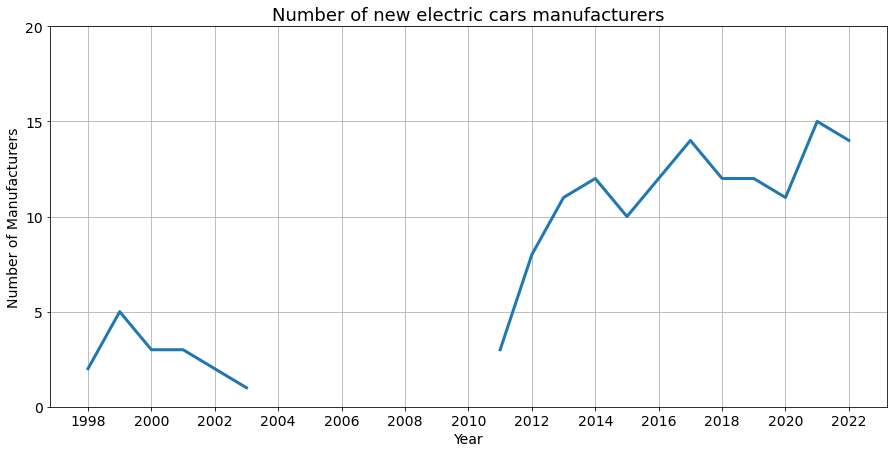

In [16]:
plt.figure(figsize = (15, 7))
plt.plot(count_table_electric_vehicles.loc[:,'electric_makes'], linewidth = 3)
plt.title('Number of new electric cars manufacturers', size = 18)
plt.xlabel('Year', size = 14)
plt.ylabel('Number of Manufacturers', size =14)
plt.xticks(ticks = range(1998,2023,2),size = 14)
plt.yticks(ticks = range(0,25,5), size = 14)
plt.grid()


We can see from this that there is an increase in electric vehicles, but it is now still about 60 cars. I will check how many car marks are there.

#### Checking for top 3 Electric vehicles manufacturers in 2021

In [17]:
vehicles[(vehicles['fuelType1']=='Electricity')& (vehicles['year'] == 2021)]['make'].value_counts()

Tesla         13
Porsche       10
Ford           7
Volkswagen     5
Nissan         3
Audi           2
BMW            2
Hyundai        2
MINI           1
Polestar       1
Volvo          1
Kandi          1
Chevrolet      1
Kia            1
Jaguar         1
Name: make, dtype: int64

* Surprising fact is the __Porsche__ is on the second place (with audi). In 2021, Porsche was on the second place, with audi catching up in 2022. I will look a little more at porsche models, to find out exactly how this is possible and what models they offer.

In [18]:
vehicles[(vehicles['fuelType1']=='Electricity')& (vehicles['year'] == 2021) & ((vehicles['make']== 'Porsche') | (vehicles['make']== 'Audi') | (vehicles['make']== 'Tesla') )].loc[:,['make', 'model']].sort_values(by = ['make', 'model'], ascending = True)

,make,model
36818,Audi,e-tron
36819,Audi,e-tron Sportback
38152,Porsche,Taycan 4 Cross Turismo
38153,Porsche,Taycan 4S Cross Turismo
37024,Porsche,Taycan 4S Perf Battery
37025,Porsche,Taycan 4S Perf Battery Plus
37155,Porsche,Taycan Perf Battery
37156,Porsche,Taycan Perf Battery Plus
37265,Porsche,Taycan Turbo
38155,Porsche,Taycan Turbo Cross Turismo


etron model for Audi is: 
    https://www.audiusa.com/us/web/en/models/e-tron/e-tron/2022/overview.html

Taycan model for Porsche is:
https://www.porsche.com/usa/models/taycan/

Tesla only offers electric cars


#### Getting more in depth - create a function to get data easily

* Below a function to easy get data about makes and fuel types for in depth analysis

In [19]:
def check_make_for_fuel_type (data_frame=vehicles, make_variable = 'Audi', fuel_type_variable = 'Diesel'):
    
    #from point 1)
    cars_with_specific_make = vehicles[vehicles['make']== make_variable]
    
    #from point 2)
    fuel_type_included = (cars_with_specific_make['fuelType1'] == fuel_type_variable).sum()
    
    #from point 3)
    any_cars_with_selected_fuel_type = True if fuel_type_included > 0 else False
    
    #from point 4) and 5) together
    if any_cars_with_selected_fuel_type:
        cars_with_specific_make_and_fuel = cars_with_specific_make[cars_with_specific_make['fuelType1'] == fuel_type_variable]
        make_model_year_of_selected_fuel_type = cars_with_specific_make_and_fuel.loc[:, ['make', 'model', 'year', 'fuelType1']]
        make_model_year_of_selected_fuel_type.sort_values(by = 'year', ascending = True, inplace = True)
        print(make_model_year_of_selected_fuel_type)
    else:
        print(f'no results found for {make_variable} for selected fuel type: {fuel_type_variable}')
        


Call to the function above to get any __Electric Audi__ model and after the example of how to get __Diesel Porsche__ to demonstrate how this function works. It definitely help with the enalysis

In [20]:
check_make_for_fuel_type(vehicles, 'Audi', "Electricity")

       make                                model  year    fuelType1
34506  Audi                               e-tron  2019  Electricity
35913  Audi                     e-tron Sportback  2020  Electricity
36818  Audi                               e-tron  2021  Electricity
36819  Audi                     e-tron Sportback  2021  Electricity
38212  Audi                            e-tron GT  2022  Electricity
38213  Audi               e-tron S (20in wheels)  2022  Electricity
38214  Audi       e-tron S (21in or 22in wheels)  2022  Electricity
38215  Audi     e-tron S Sportback (20in wheels)  2022  Electricity
38217  Audi  e-tron S Sportback (21/22in wheels)  2022  Electricity
38218  Audi                    Q4 e-tron quattro  2022  Electricity
38219  Audi          Q4 e-tron Sportback quattro  2022  Electricity
38220  Audi                         RS e-tron GT  2022  Electricity
38372  Audi                       e-tron quattro  2022  Electricity
38373  Audi             e-tron Sportback quattro

In [21]:
check_make_for_fuel_type(vehicles, 'Porsche', "Diesel")

          make           model  year fuelType1
25397  Porsche  Cayenne Diesel  2013    Diesel
25932  Porsche  Cayenne Diesel  2014    Diesel
28105  Porsche  Cayenne Diesel  2015    Diesel
29408  Porsche  Cayenne Diesel  2016    Diesel


#### Summarizing data for the report

* Data below will be used to create summary tables. They are exported to excell to apply nicer formatting.

In [22]:
only_electric_cars.loc[:, ['year','make',  'model']].sort_values(by='make').sort_values('year').to_csv('cars_year_tews.csv')

In [23]:
only_electric_cars.groupby(['year', 'make']).count()['model'].to_csv('export_test.csv')

### Resources used of referenced:
* https://medium.com/analytics-vidhya/the-jupyter-notebook-formatting-guide-873ab39f765e
* https://github.com/nicolas-gervais/predicting-car-price-from-scraped-data
* https://electricautonomy.ca/ev-tracker/
